In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import callbacks

In [2]:
data = datasets.load_breast_cancer()
x = data.data
y = data.target
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [3]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
model_1.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_1.add(tf.keras.layers.Dropout(0.25))
model_1.add(tf.keras.layers.Dense(54, activation='sigmoid'))
model_1.add(tf.keras.layers.Dropout(0.25))
model_1.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_1.add(tf.keras.layers.Dropout(0.25))
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adamax',
            loss='mean_squared_logarithmic_error',
            metrics=['accuracy'])


In [4]:
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr*tf.math.exp(-0.5))

In [5]:
E = callbacks.EarlyStopping(patience = 20, monitor = 'val_loss')

In [6]:
L = callbacks.LearningRateScheduler(scheduler)

In [7]:
history = model_1.fit(x_train, y_train , epochs=30 ,validation_split = 0.1 ,verbose = 1, batch_size = 1, callbacks = [E, L])

Epoch 1/30
409/409 [==============================] - 3s 3ms/step - loss: 0.1163 - accuracy: 0.5697 - val_loss: 0.1214 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 2/30
409/409 [==============================] - 1s 2ms/step - loss: 0.1206 - accuracy: 0.5208 - val_loss: 0.1245 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 3/30
409/409 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.6259 - val_loss: 0.1207 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 4/30
409/409 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.5623 - val_loss: 0.1187 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 5/30
409/409 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.6553 - val_loss: 0.1133 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 6/30
409/409 [==============================] - 1s 3ms/step - loss: 0.1011 - accuracy: 0.6601 - val_loss: 0.1007 - val_accuracy: 0.8696 - lr: 0.0010
Epoch 7/30
409/409 [==============================] - 1s 3ms/step - lo

4/4 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9211


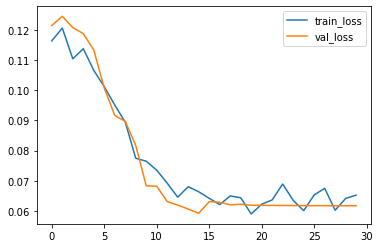

In [8]:
model_1.evaluate(x_test , y_test)

accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.figure()
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()

# second

Epoch 1/30
409/409 [==============================] - 4s 3ms/step - loss: 0.1130 - accuracy: 0.5941 - val_loss: 0.1153 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 2/30
409/409 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.7286 - val_loss: 0.0941 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 3/30
409/409 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.8191 - val_loss: 0.0575 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 4/30
409/409 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.8606 - val_loss: 0.0384 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 5/30
409/409 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.8313 - val_loss: 0.0697 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 6/30
409/409 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.8215 - val_loss: 0.0338 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 7/30
409/409 [==============================] - 1s 3ms/step - lo

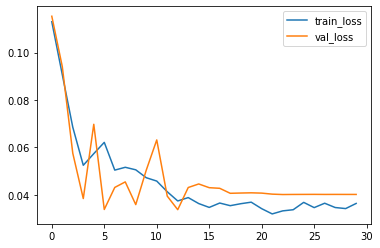

In [9]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
model_2.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_2.add(tf.keras.layers.Dropout(0.25))
model_2.add(tf.keras.layers.Dense(54, activation='sigmoid'))
model_2.add(tf.keras.layers.Dropout(0.25))
model_2.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_2.add(tf.keras.layers.Dropout(0.25))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer='Nadam',
            loss='mean_squared_logarithmic_error',
            metrics=['accuracy'])

history = model_2.fit(x_train, y_train , epochs=30 ,validation_split = 0.1 ,verbose = 1, batch_size = 1, callbacks = [E, L])

model_2.evaluate(x_test , y_test)

accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.figure()
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()

# third

Epoch 1/30
41/41 [==============================] - 3s 12ms/step - loss: 0.1152 - accuracy: 0.5428 - val_loss: 0.1221 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1145 - accuracy: 0.5892 - val_loss: 0.1176 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.5941 - val_loss: 0.1173 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.6210 - val_loss: 0.1104 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.7213 - val_loss: 0.1020 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.7237 - val_loss: 0.0986 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 0s 4ms/step - loss: 0.0860 - 

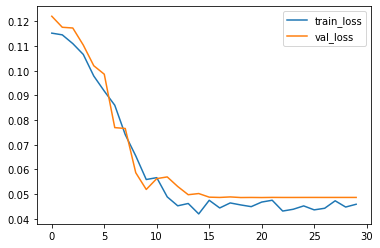

In [10]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
model_3.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_3.add(tf.keras.layers.Dropout(0.25))
model_3.add(tf.keras.layers.Dense(54, activation='sigmoid'))
model_3.add(tf.keras.layers.Dropout(0.25))
model_3.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_3.add(tf.keras.layers.Dropout(0.25))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='Nadam',
            loss='mean_squared_logarithmic_error',
            metrics=['accuracy'])

history = model_3.fit(x_train, y_train , epochs=30 ,validation_split = 0.1 ,verbose = 1, batch_size = 10, callbacks = [E, L])

model_3.evaluate(x_test , y_test)

accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.figure()
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()

# fourth

Epoch 1/30
41/41 [==============================] - 2s 12ms/step - loss: 0.1162 - accuracy: 0.5086 - val_loss: 0.1218 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.5452 - val_loss: 0.1216 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.5721 - val_loss: 0.1167 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.5941 - val_loss: 0.1148 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.6797 - val_loss: 0.1104 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.6895 - val_loss: 0.1026 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 0s 4ms/step - loss: 0.0982 - 

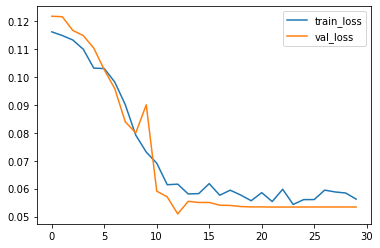

In [11]:
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
model_4.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_4.add(tf.keras.layers.Dropout(0.25))
model_4.add(tf.keras.layers.Dense(54, activation='sigmoid'))
model_4.add(tf.keras.layers.Dropout(0.25))
model_4.add(tf.keras.layers.Dense(27, activation='sigmoid'))
model_4.add(tf.keras.layers.Dropout(0.25))
model_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_4.compile(optimizer='adam',
            loss='mean_squared_logarithmic_error',
            metrics=['accuracy'])

history = model_4.fit(x_train, y_train , epochs=30 ,validation_split = 0.1 ,verbose = 1, batch_size = 10, callbacks = [E, L])

model_4.evaluate(x_test , y_test)

accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.figure()
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()